# Continous Wavelet Transform

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as mpls
mpls.use('default')

In [2]:
ioc = pd.read_csv('./IOC.csv', parse_dates=True, index_col=0)
ioc.index = ioc.index.tz_localize('UTC')
ioc.index = ioc.index.tz_convert('Asia/Tokyo')
ioc = ioc.rename_axis('Time (JST)')
ioc.head()

Toyama (m)  Sado (m)  Fukaura (m)  Saigo (m)  \
Time (JST)                                                                
2024-01-01 09:00:00+09:00       0.075     0.031        0.006      0.058   
2024-01-01 09:01:00+09:00       0.074     0.037        0.021      0.060   
2024-01-01 09:02:00+09:00       0.051     0.037        0.012      0.059   
2024-01-01 09:03:00+09:00       0.038     0.006        0.021      0.055   
2024-01-01 09:04:00+09:00       0.073     0.027        0.027      0.054   

                           Rudnaya (m)  Preobrazheniye (m)  Sosunovo (m)  
Time (JST)                                                                
2024-01-01 09:00:00+09:00       -0.060              -0.009         0.010  
2024-01-01 09:01:00+09:00        0.041              -0.048         0.000  
2024-01-01 09:02:00+09:00       -0.068              -0.017         0.001  
2024-01-01 09:03:00+09:00        0.022               0.004         0.002  
2024-01-01 09:04:00+09:00       -0.037              -0.015         0.003

In [3]:
gsi = pd.read_csv('./GSI.csv', parse_dates=True, date_format='%Y/%m/%d %H:%M:%S', index_col=0)
gsi.index = gsi.index.tz_localize('Asia/Tokyo')
gsi = gsi[1080:-360].copy()
gsi.head()

Kashiwazaki (m)  Mikuni (m)  Oga (m)  Okushiri (m)  \
Time (JST)                                                                      
2024-01-01 09:00:00+09:00           -0.004       0.024    0.008         0.008   
2024-01-01 09:00:30+09:00            0.003       0.005   -0.056         0.002   
2024-01-01 09:01:00+09:00           -0.004      -0.003   -0.046         0.001   
2024-01-01 09:01:30+09:00            0.008       0.022    0.019         0.005   
2024-01-01 09:02:00+09:00           -0.015      -0.004    0.047         0.001   

                           Tobishima (m)  
Time (JST)                                
2024-01-01 09:00:00+09:00          0.007  
2024-01-01 09:00:30+09:00         -0.038  
2024-01-01 09:01:00+09:00         -0.042  
2024-01-01 09:01:30+09:00         -0.041  
2024-01-01 09:02:00+09:00          0.015

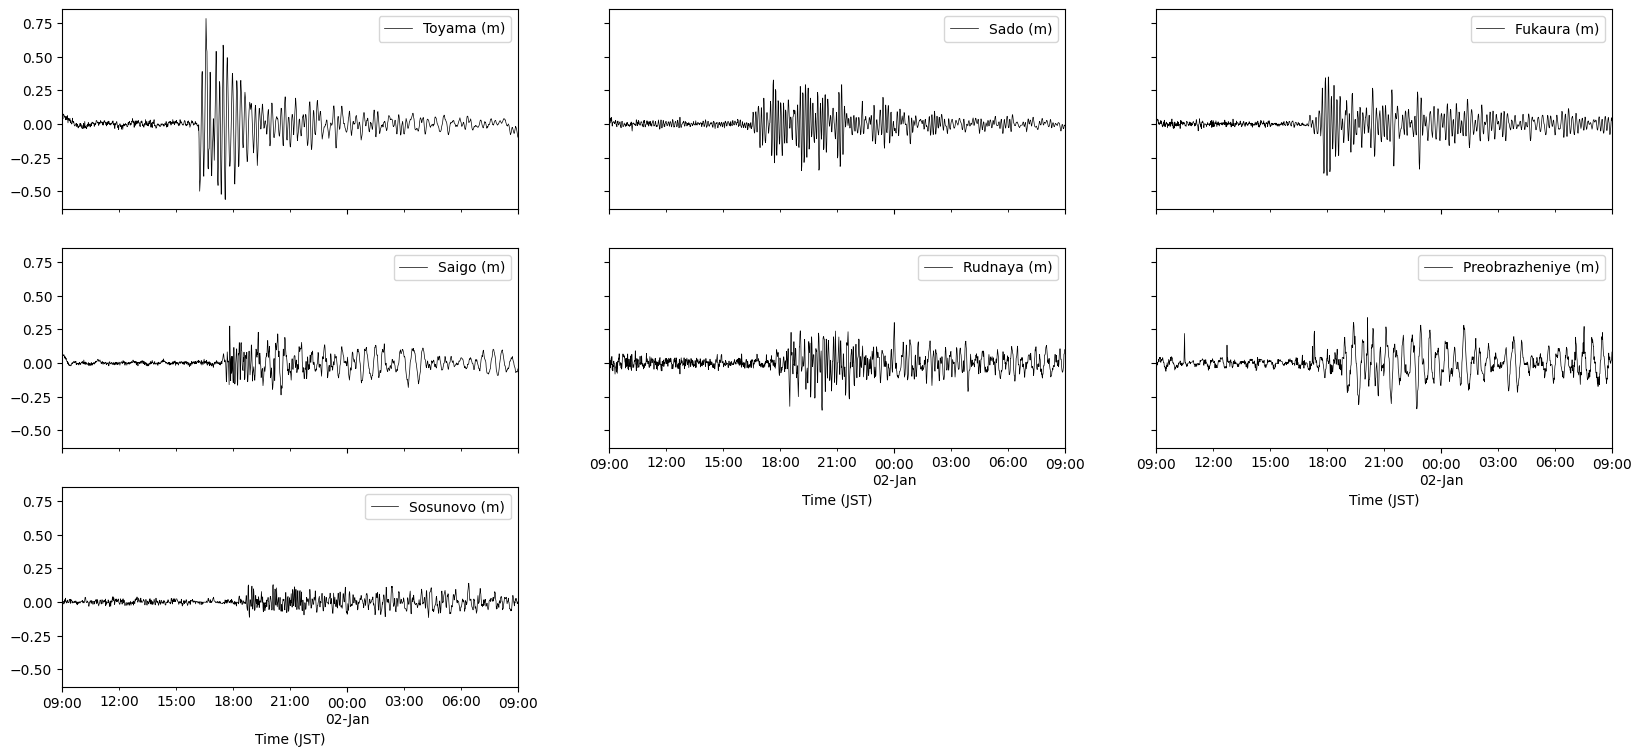

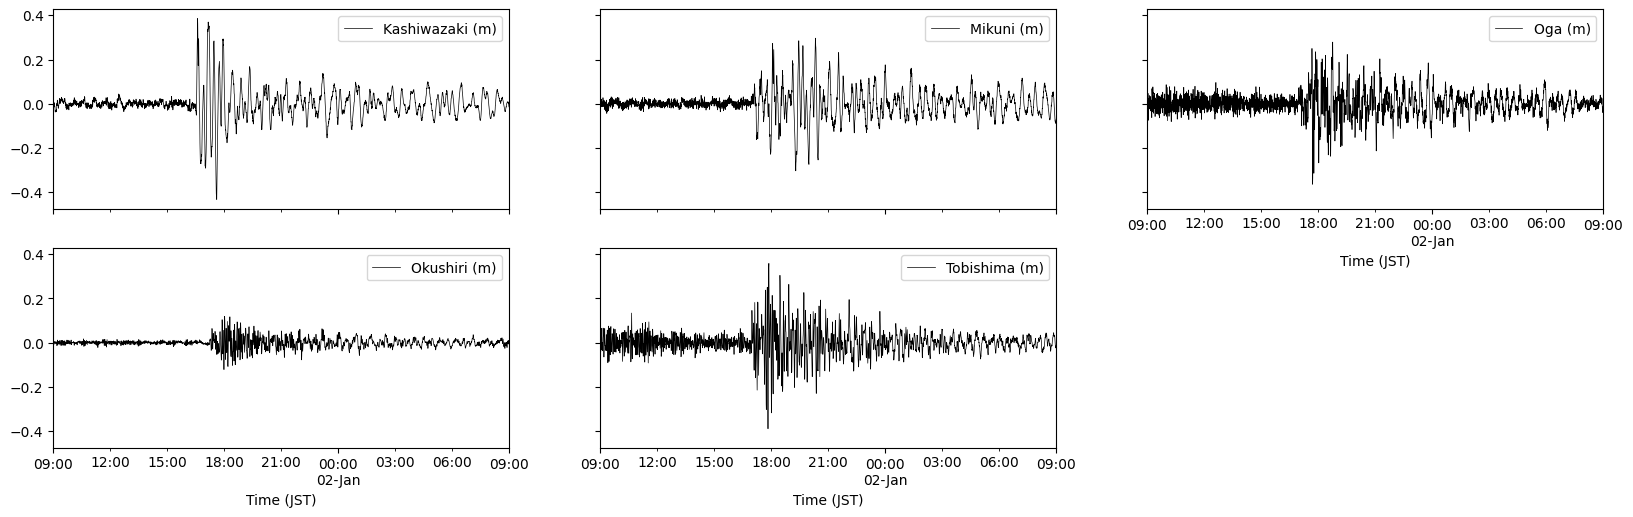

In [4]:
ioc.plot(subplots=True,layout=(5,3),sharex=True,sharey=True,figsize=(20,15),lw=0.5, color='k');
gsi.plot(subplots=True,layout=(5,3),sharex=True,sharey=True,figsize=(20,15),lw=0.5, color='k');

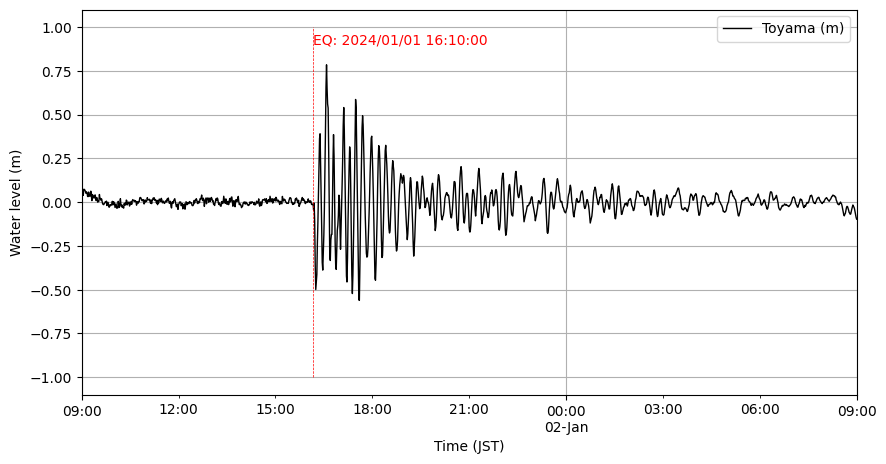

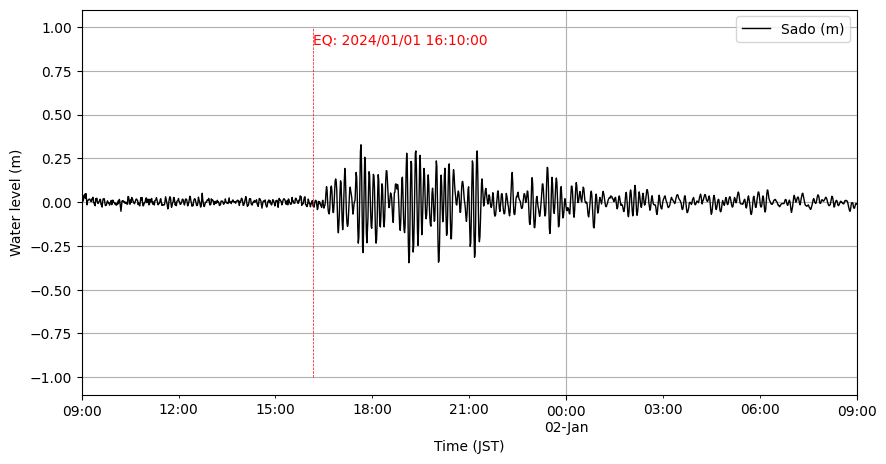

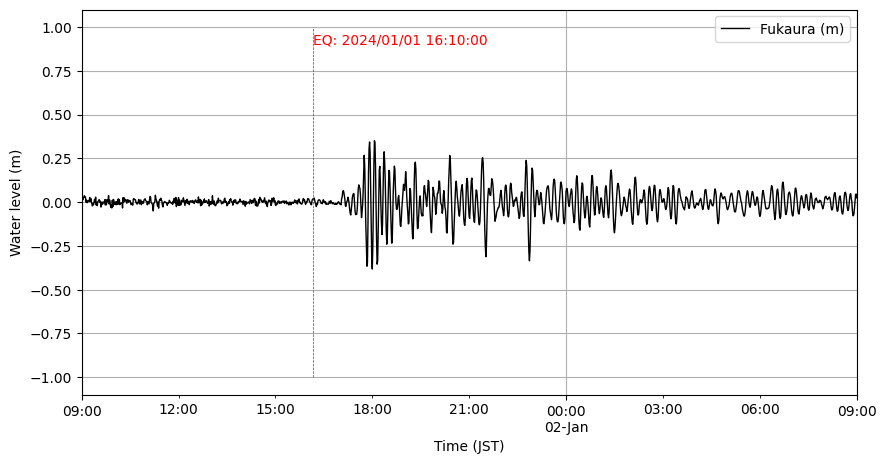

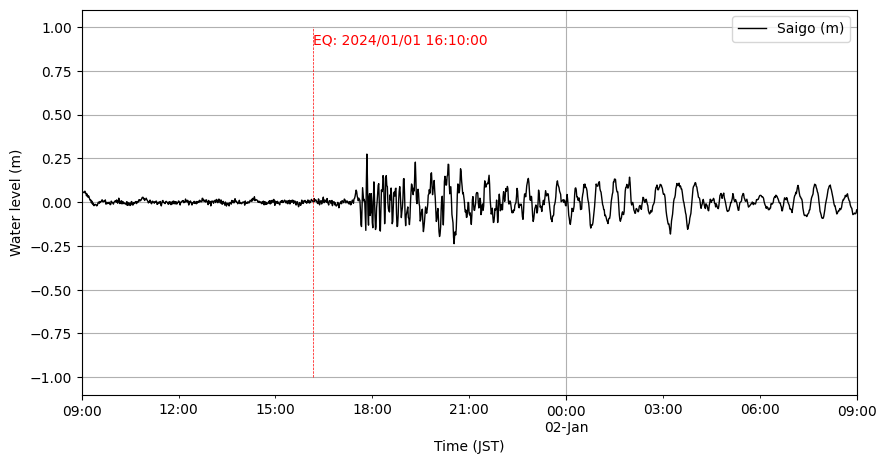

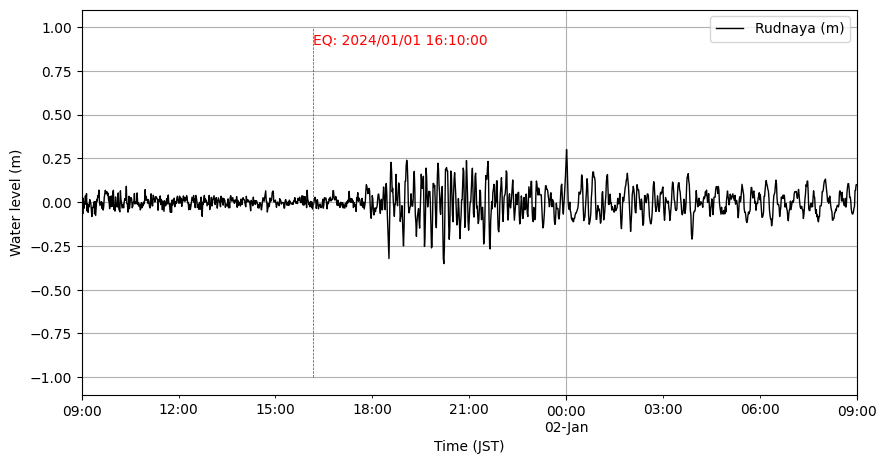

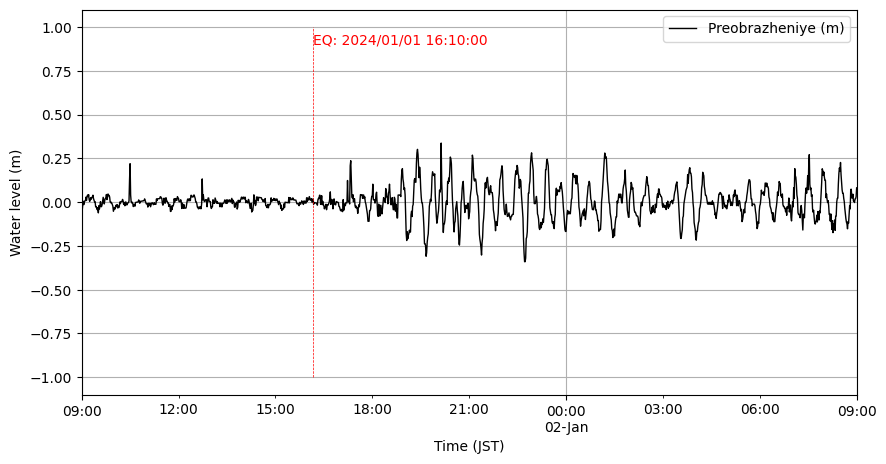

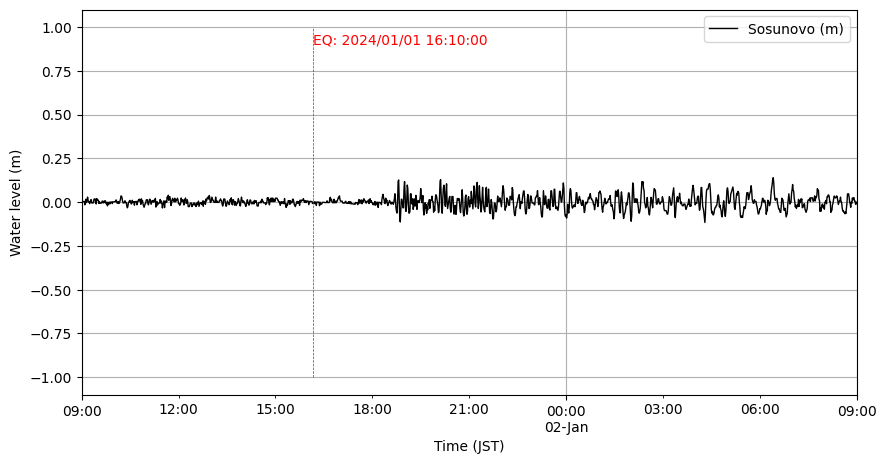

In [5]:
for col in ioc.columns:
    fig, ax = plt.subplots(figsize=(10,5))
    ioc[col].plot(ax=ax, lw=1, color='k', label=col)
    ax.vlines('2024-01-01 16:10:00', -1, 1, color='r', ls='--', lw=0.5)
    ax.annotate('EQ: 2024/01/01 16:10:00', xy=('2024-01-01 16:10:00', 0.9), xytext=('2024-01-01 16:10:00', 0.9), color='r')
    ax.set_ylabel('Water level (m)')
    ax.legend()
    ax.grid()
    plt.savefig(f'./{col}.png', dpi=300, bbox_inches='tight')

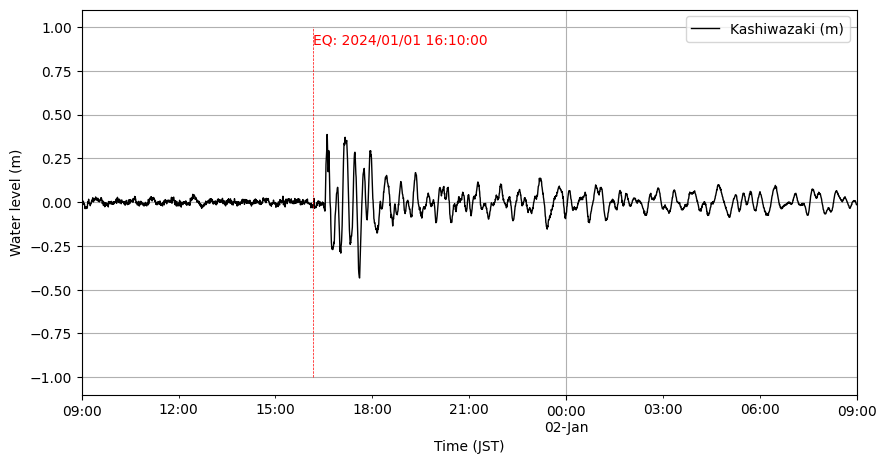

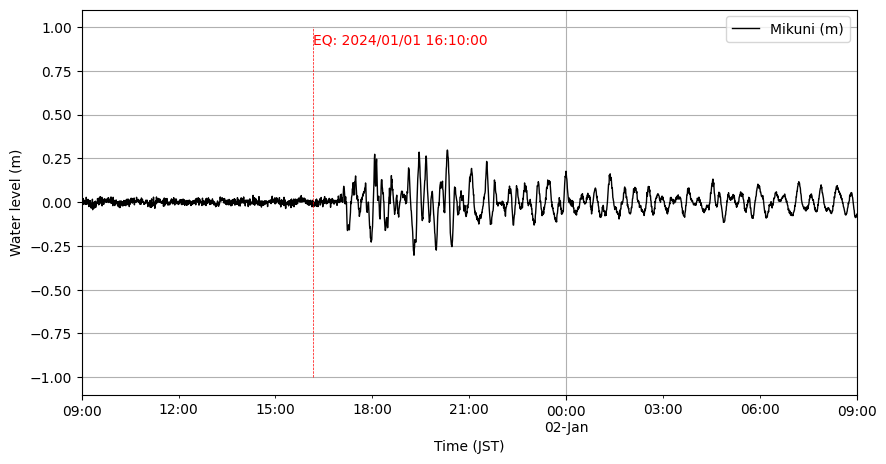

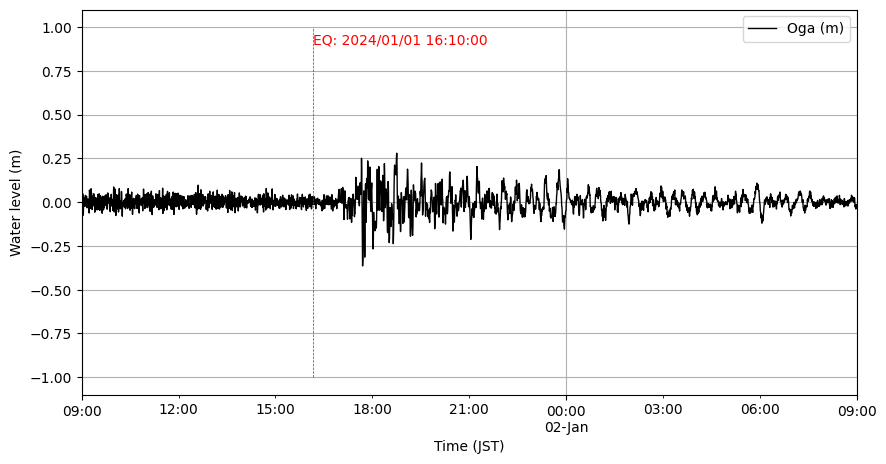

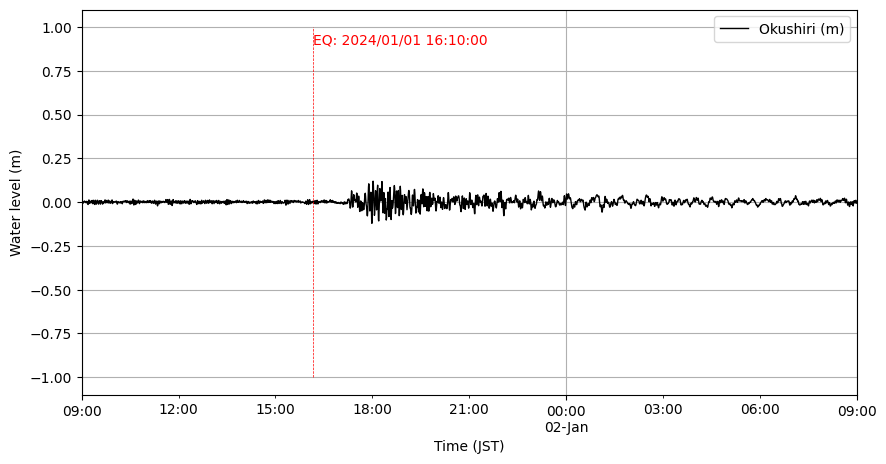

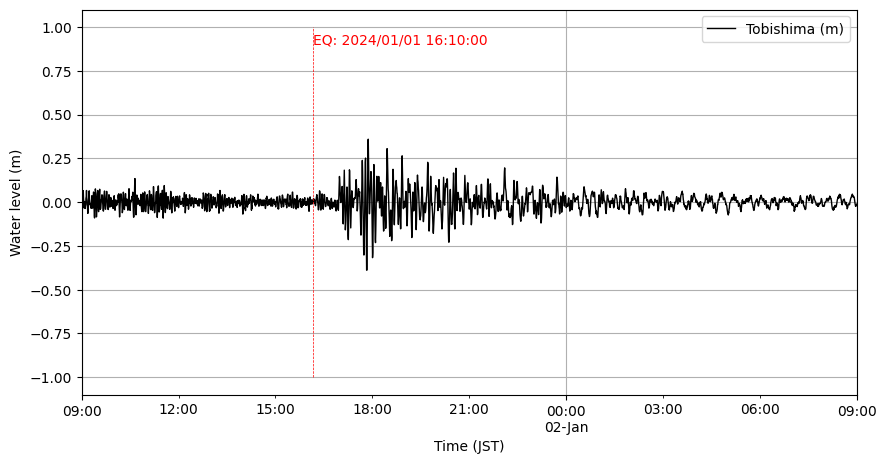

In [6]:
for col in gsi.columns:
    fig, ax = plt.subplots(figsize=(10,5))
    gsi[col].plot(ax=ax, lw=1, color='k', label=col)
    ax.vlines('2024-01-01 16:10:00', -1, 1, color='r', ls='--', lw=0.5)
    ax.annotate('EQ: 2024/01/01 16:10:00', xy=('2024-01-01 16:10:00', 0.9), xytext=('2024-01-01 16:10:00', 0.9), color='r')
    ax.set_ylabel('Water level (m)')
    ax.legend()
    ax.grid()
    plt.savefig(f'./{col}.png', dpi=300, bbox_inches='tight')

# Plotting with simulated

In [7]:
sim_df = pd.read_table('pointNL.dat', delim_whitespace=True, header=None, 
              names=['time', 'Mikuni', 'Wajima', 'Suzu', 'Toyama', 'Sado', 
                     'Kashiwazaki', 'Niigata-West', 'Niigata-East','Tobishima', 'Fukaura'])
sim_df.head()

time  Mikuni  Wajima   Suzu  Toyama  Sado  Kashiwazaki  Niigata-West  \
0   0.1     0.0    1.22  0.391     0.0   0.0          0.0           0.0   
1   0.2     0.0    1.22  0.393     0.0   0.0          0.0           0.0   
2   0.3     0.0    1.22  0.396     0.0   0.0          0.0           0.0   
3   0.4     0.0    1.22  0.401     0.0   0.0          0.0           0.0   
4   0.5     0.0    1.22  0.406     0.0   0.0          0.0           0.0   

   Niigata-East  Tobishima  Fukaura  
0           0.0        0.0      0.0  
1           0.0        0.0      0.0  
2           0.0        0.0      0.0  
3           0.0        0.0      0.0  
4           0.0        0.0      0.0

In [9]:
sim_df.index = pd.date_range('2024-01-01 16:10:06', '2024-01-01 19:10:00', freq='0.1Min').tz_localize('Asia/Tokyo')[:848]

In [10]:
sim_df.head()

time  Mikuni  Wajima   Suzu  Toyama  Sado  \
2024-01-01 16:10:06+09:00   0.1     0.0    1.22  0.391     0.0   0.0   
2024-01-01 16:10:12+09:00   0.2     0.0    1.22  0.393     0.0   0.0   
2024-01-01 16:10:18+09:00   0.3     0.0    1.22  0.396     0.0   0.0   
2024-01-01 16:10:24+09:00   0.4     0.0    1.22  0.401     0.0   0.0   
2024-01-01 16:10:30+09:00   0.5     0.0    1.22  0.406     0.0   0.0   

                           Kashiwazaki  Niigata-West  Niigata-East  Tobishima  \
2024-01-01 16:10:06+09:00          0.0           0.0           0.0        0.0   
2024-01-01 16:10:12+09:00          0.0           0.0           0.0        0.0   
2024-01-01 16:10:18+09:00          0.0           0.0           0.0        0.0   
2024-01-01 16:10:24+09:00          0.0           0.0           0.0        0.0   
2024-01-01 16:10:30+09:00          0.0           0.0           0.0        0.0   

                           Fukaura  
2024-01-01 16:10:06+09:00      0.0  
2024-01-01 16:10:12+09:00      0.0  
2024-01-01 16:10:18+09:00      0.0  
2024-01-01 16:10:24+09:00      0.0  
2024-01-01 16:10:30+09:00      0.0

Text(0.5, 1.0, 'Toyama')

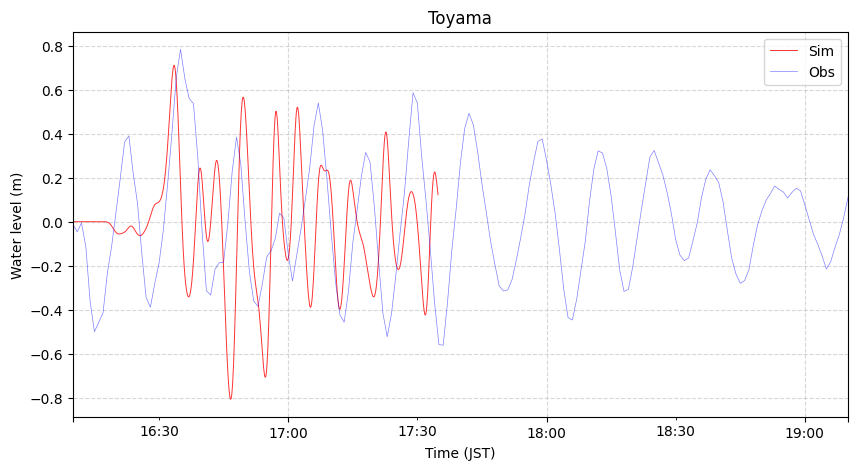

In [11]:
ax = sim_df['Toyama'].plot(figsize=(10,5), color='r', label='Sim', lw=0.7, alpha=0.8)
ioc['Toyama (m)'].plot(ax=ax, color='b', label='Obs', alpha=0.5, lw=0.5)
ax.set_xlim('2024-01-01 16:10:00', '2024-01-01 19:10:00')
ax.grid(linestyle='--', alpha=0.5)
ax.legend()
ax.set_ylabel('Water level (m)')
ax.set_title('Toyama')


Text(0.5, 1.0, 'Sado')

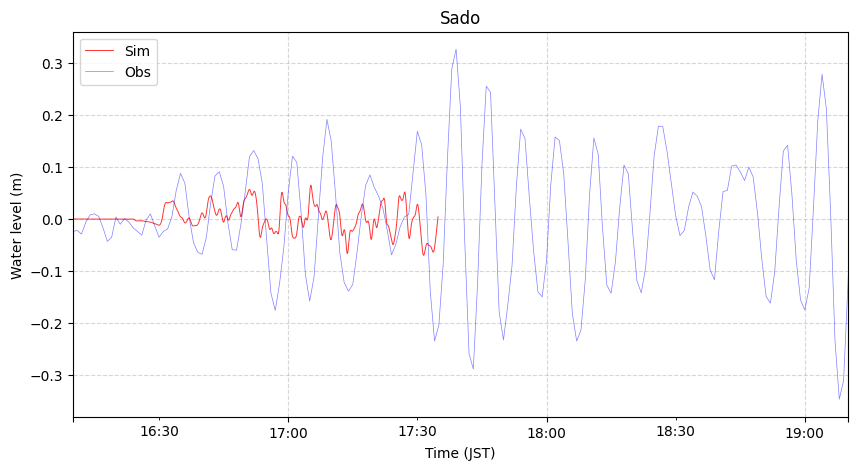

In [12]:
ax = sim_df['Sado'].plot(figsize=(10,5), color='r', label='Sim', lw=0.7, alpha=0.8)
ioc['Sado (m)'].plot(ax=ax, color='b', label='Obs', alpha=0.5, lw=0.5)
ax.set_xlim('2024-01-01 16:10:00', '2024-01-01 19:10:00')
ax.grid(linestyle='--', alpha=0.5)
ax.legend()
ax.set_ylabel('Water level (m)')
ax.set_title('Sado')


Text(0.5, 1.0, 'Fukaura')

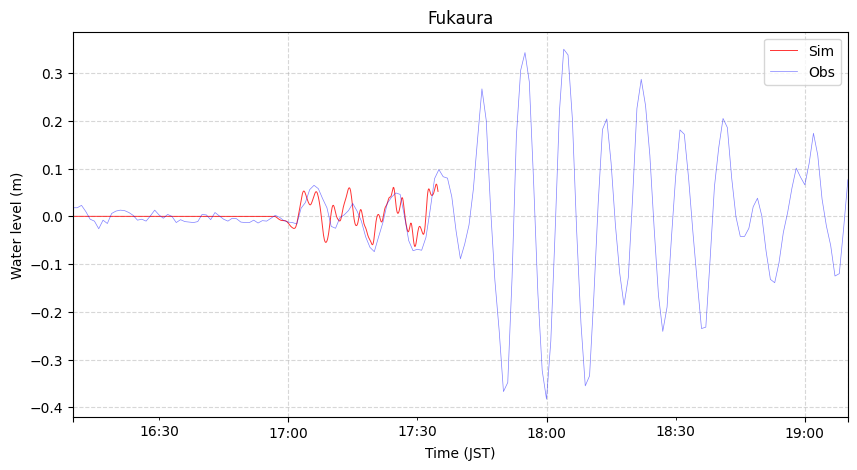

In [13]:
ax = sim_df['Fukaura'].plot(figsize=(10,5), color='r', label='Sim', lw=0.7, alpha=0.8)
ioc['Fukaura (m)'].plot(ax=ax, color='b', label='Obs', alpha=0.5, lw=0.5)
ax.set_xlim('2024-01-01 16:10:00', '2024-01-01 19:10:00')
ax.grid(linestyle='--', alpha=0.5)
ax.legend()
ax.set_ylabel('Water level (m)')
ax.set_title('Fukaura')


Text(0.5, 1.0, 'Kashiwazaki')

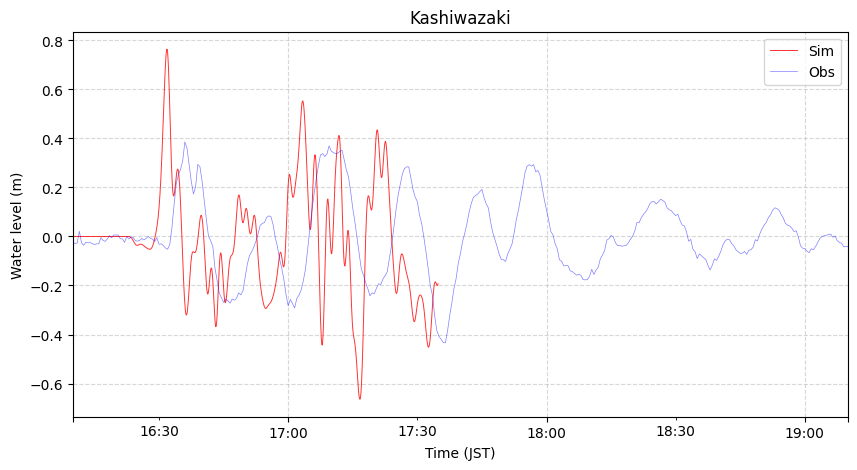

In [14]:
ax = sim_df['Kashiwazaki'].plot(figsize=(10,5), color='r', label='Sim', lw=0.7, alpha=0.8)
gsi['Kashiwazaki (m)'].plot(ax=ax, color='b', label='Obs', alpha=0.5, lw=0.5)
ax.set_xlim('2024-01-01 16:10:00', '2024-01-01 19:10:00')
ax.grid(linestyle='--', alpha=0.5)
ax.legend()
ax.set_ylabel('Water level (m)')
ax.set_title('Kashiwazaki')


Text(0.5, 1.0, 'Tobishima')

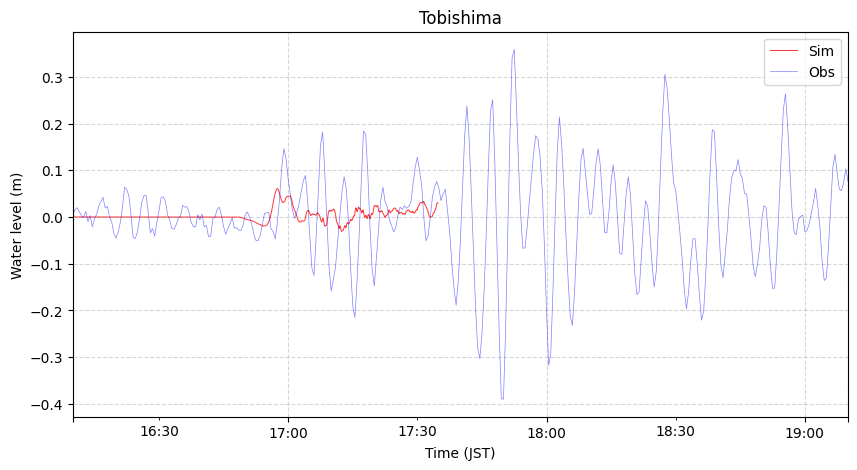

In [15]:
ax = sim_df['Tobishima'].plot(figsize=(10,5), color='r', label='Sim', lw=0.7, alpha=0.8)
gsi['Tobishima (m)'].plot(ax=ax, color='b', label='Obs', alpha=0.5, lw=0.5)
ax.set_xlim('2024-01-01 16:10:00', '2024-01-01 19:10:00')
ax.grid(linestyle='--', alpha=0.5)
ax.legend()
ax.set_ylabel('Water level (m)')
ax.set_title('Tobishima')


# Mapping stations

In [40]:
ioc.columns, gsi.columns

(Index(['Toyama (m)', 'Sado (m)', 'Fukaura (m)', 'Saigo (m)', 'Rudnaya (m)',
        'Preobrazheniye (m)', 'Sosunovo (m)'],
       dtype='object'),
 Index(['Kashiwazaki (m)', 'Mikuni (m)', 'Oga (m)', 'Okushiri (m)',
        'Tobishima (m)'],
       dtype='object'))

In [49]:
stations = {"Toyama":(36.760000,137.220000),
            "Sado":(38.320000,138.520000),
            "Fukaura":(40.650000,139.930000),
            "Saigo":(36.200000,133.330000),
            "Rudnaya":(44.350000,135.800000),
            "Preobrazheniye":(42.909229,133.922482),
            "Sosunovo":(46.530000,138.330000),
            "Kashiwazaki":(37.350000,138.516667),
            "Mikuni":(36.250000,136.150000),
            "Oga":(39.950000,139.700000),
            "Okushiri":(42.083333,139.483333),
            "Tobishima":(39.183333,139.550000)
            }

In [55]:
stations

{'Toyama': (36.76, 137.22),
 'Sado': (38.32, 138.52),
 'Fukaura': (40.65, 139.93),
 'Saigo': (36.2, 133.33),
 'Rudnaya': (44.35, 135.8),
 'Preobrazheniye': (42.909229, 133.922482),
 'Sosunovo': (46.53, 138.33),
 'Kashiwazaki': (37.35, 138.516667),
 'Mikuni': (36.25, 136.15),
 'Oga': (39.95, 139.7),
 'Okushiri': (42.083333, 139.483333),
 'Tobishima': (39.183333, 139.55)}

In [62]:
df.T

0           1
Toyama          36.760000  137.220000
Sado            38.320000  138.520000
Fukaura         40.650000  139.930000
Saigo           36.200000  133.330000
Rudnaya         44.350000  135.800000
Preobrazheniye  42.909229  133.922482
Sosunovo        46.530000  138.330000
Kashiwazaki     37.350000  138.516667
Mikuni          36.250000  136.150000
Oga             39.950000  139.700000
Okushiri        42.083333  139.483333
Tobishima       39.183333  139.550000

In [63]:
# convert stations into a geopandas dataframe and set the coordinate reference system to WGS84
df = pd.DataFrame(stations)
gdf = gpd.GeoDataFrame(df.T, geometry=gpd.points_from_xy(df.iloc[1].values, df.iloc[0].values),crs='epsg:4326')

In [71]:
gdf = gdf.reset_index()

In [73]:
gdf.head()

index      0       1                    geometry
0   Toyama  36.76  137.22  POINT (137.22000 36.76000)
1     Sado  38.32  138.52  POINT (138.52000 38.32000)
2  Fukaura  40.65  139.93  POINT (139.93000 40.65000)
3    Saigo  36.20  133.33  POINT (133.33000 36.20000)
4  Rudnaya  44.35  135.80  POINT (135.80000 44.35000)

In [74]:
gdf.rename(columns={'index':'Station',0:'Latitude',1:'Longitude'},inplace=True)

In [98]:
# use gdf.explore() and add the station name as a label in the plot
m = gdf.explore("Station",
            popup_columns=["Station"],
            popup_hover=True, 
            marker_type='circle_marker', 
            marker_kwds={'radius':10},
            tiles="CartoDB positron"
            )
m
# m.save('stations.html')
m

## Plot waveform and CWT

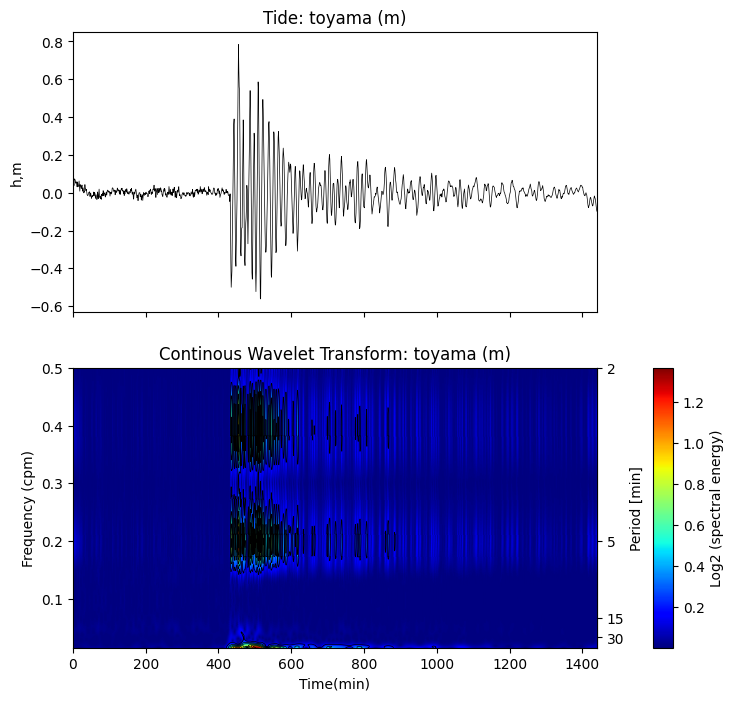

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as mpls
from scipy import signal
mpls.use('default')

def freq2period(x):
    # 1/x with special treatment of x == 0
    x = np.array(x).astype(float)
    near_zero = np.isclose(x, 0)
    x[near_zero] = 10e2
    x[~near_zero] = 1 / x[~near_zero]
    return x

df_cwt = dftk
col = 0
sign = df_cwt.iloc[:,col].to_numpy()
xt = np.arange(0,df_cwt.shape[0],1)
## RIcker (Mexican hat)
# a,b = 2,180 #is this 10min to 900min=15h?
# widths = np.arange(a,b)
# cwtmatr = signal.cwt(sign,signal.ricker,widths)

## Morlet
fs = 1/5
w=6.
freq=np.linspace(1/64,1/2,len(sign))
p = [1/x for x in freq]
widths = w*fs / (2*freq*np.pi)
cwtm = signal.cwt(sign,signal.morlet2,widths,w=w)

fig,axs = plt.subplots(2,sharex=True,figsize=(8,8))
xt = np.arange(0,df_cwt.shape[0],1)
axs[0].plot(xt,sign,c='k',lw=0.5)
axs[0].set_ylabel('h,m')
axs[0].set_title(f'Tide: {df_cwt.columns[col]}')

im = axs[1].pcolormesh(xt,freq, np.abs(cwtm), cmap='jet', 
                       shading='gouraud')
                      # vmin=120,vmax=140)
                      #  vmin=-abs(cwtm).max(),vmax=abs(cwtm).max())
# im = axs[1].imshow(cwtmatr,cmap='jet',extent=[0,len(sign),a,b],aspect='auto',
                  #  vmin=-10,vmax=5)
                #    vmin=-abs(cwtmatr).max(),vmax=abs(cwtmatr).max())

axs[1].contour(xt,freq,np.abs(cwtm),colors='k',origin='upper',linewidths=0.5)
axs[1].set_title(f'Continous Wavelet Transform: {df_cwt.columns[col]}')
# # axs[1].set_xlim(500,2250)
axs[1].set_xlabel('Time(min)')
# # axs[1].set_xticks(xt)
# # axs[1].set_xticklabels(xl)
axs[1].set_ylabel('Frequency (cpm)')
# # axs[1].ticklabel_format(axis="y", style="sci", scilimits=(0,0))
# axs[1].set_ylim(a,b)


secax = axs[1].secondary_yaxis('right',functions=(freq2period,freq2period))
secax.set_yticks([2,5,15,30,180])
secax.set_yticklabels([2,5,15,30,180])
secax.set_ylabel('Period [min]')
fig.subplots_adjust(right=0.78)
cbar_ax = fig.add_axes([0.85,0.11,0.025,0.35])
fig.colorbar(im,cax=cbar_ax,label='Log2 (spectral energy)')

## Plot All wf and cwt

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as mpls
from scipy import signal
mpls.use('default')
plt.ioff()

def freq2period(x):
    # 1/x with special treatment of x == 0
    x = np.array(x).astype(float)
    near_zero = np.isclose(x, 0)
    x[near_zero] = 10e2
    x[~near_zero] = 1 / x[~near_zero]
    return x

def cwt_plot(col,df_cwt,save=False):
  col = col
  sign = df_cwt.iloc[:,col].to_numpy()
  xt = np.arange(0,df_cwt.shape[0],1)
  ## Morlet
  fs = 1/5
  w=6.
  freq=np.linspace(1/180,1/2,len(sign))
  widths = w*fs / (2*freq*np.pi)
  cwtm = signal.cwt(sign,signal.morlet2,widths,w=w)
  cwtm = np.abs(cwtm)
  # cwtm = cwtm.real
  # cwtm = np.log2(cwtm)

  fig,axs = plt.subplots(2,sharex=True,figsize=(8,8))
  xt = np.arange(0,df_cwt.shape[0],1)
  axs[0].plot(xt,sign,c='k',lw=0.5)
  axs[0].set_ylabel('h,m')
  axs[0].set_title(f'Tide: {df_cwt.columns[col]}')

  im = axs[1].pcolormesh(xt,freq,cwtm, cmap='jet', 
                        shading='gouraud',vmin=0,vmax=80)

  # axs[1].contour(xt,freq,cwtm,colors='k',origin='upper',linewidths=0.5)
  axs[1].set_title(f'Continous Wavelet Transform: {df_cwt.columns[col]}')
  axs[1].set_xlabel('Time(min)')
  axs[1].set_ylabel('Frequency (cpm)')
  
  secax = axs[1].secondary_yaxis('right',functions=(freq2period,freq2period))
  secax.set_yticks([2,5,15,30,180])
  secax.set_yticklabels([2,5,15,30,180])
  secax.set_ylabel('Period [min]')
  fig.subplots_adjust(right=0.78)
  cbar_ax = fig.add_axes([0.85,0.11,0.025,0.35])
  fig.colorbar(im,cax=cbar_ax,label='spectral energy')
  if save:
    plt.savefig(f'./cwt_figs/{col:03d}.png')

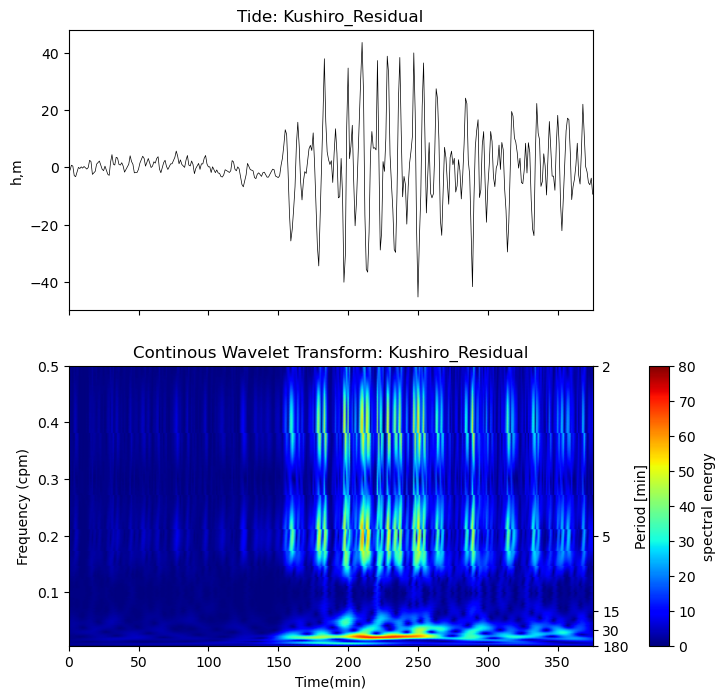

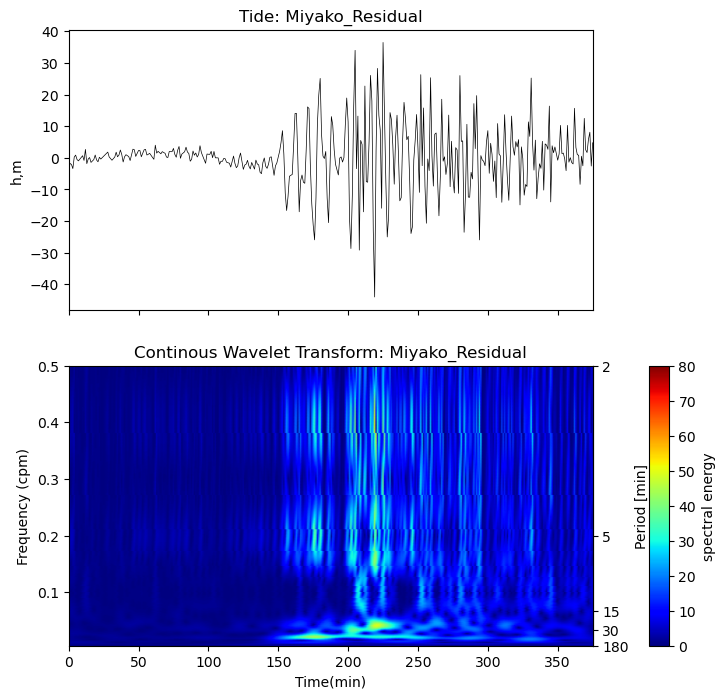

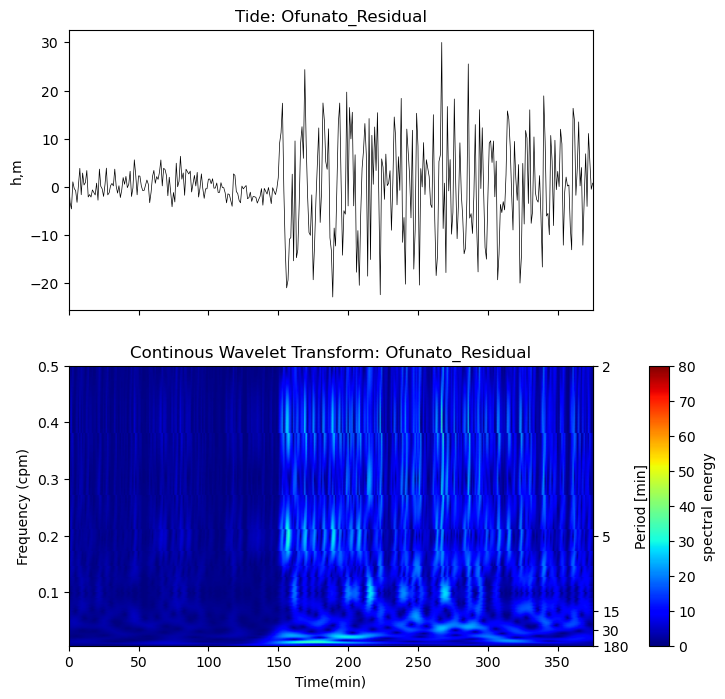

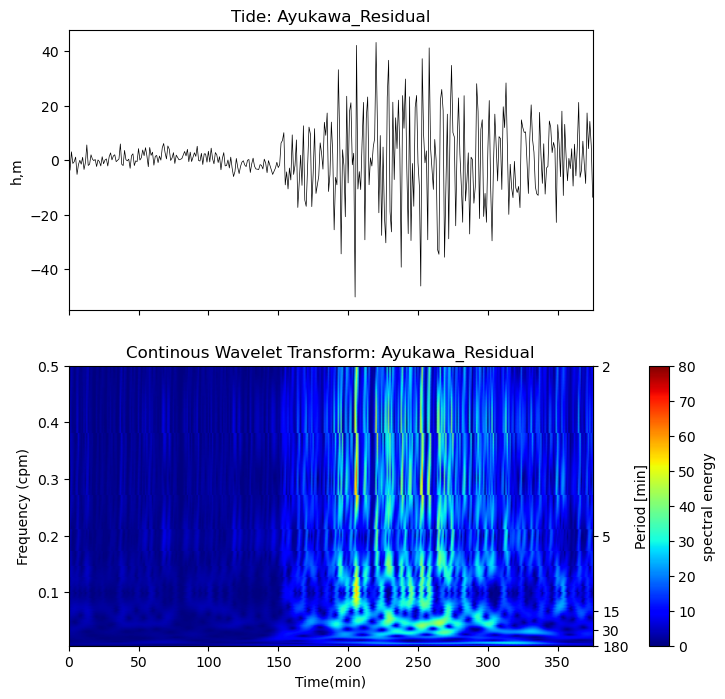

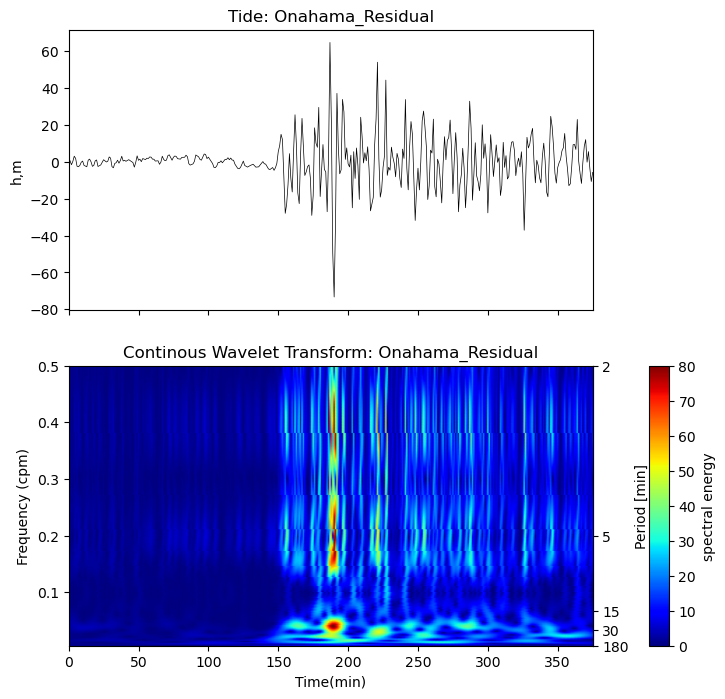

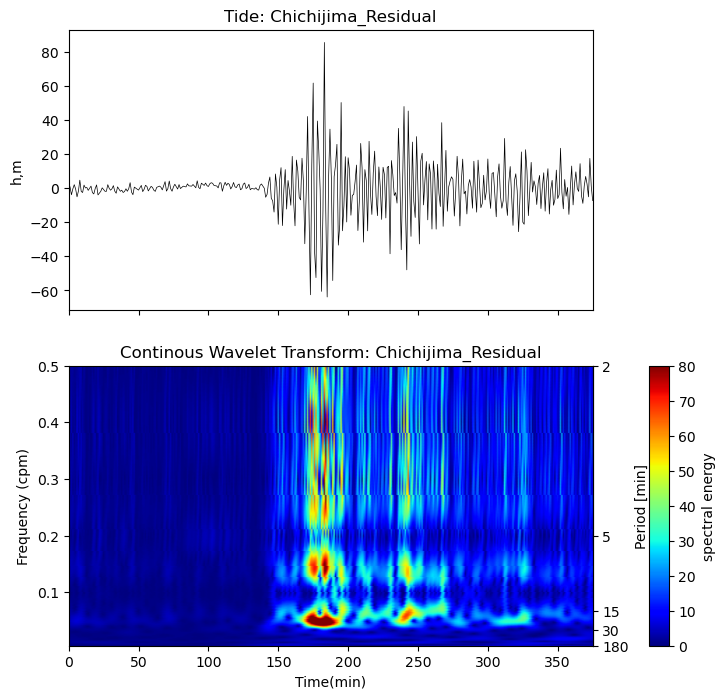

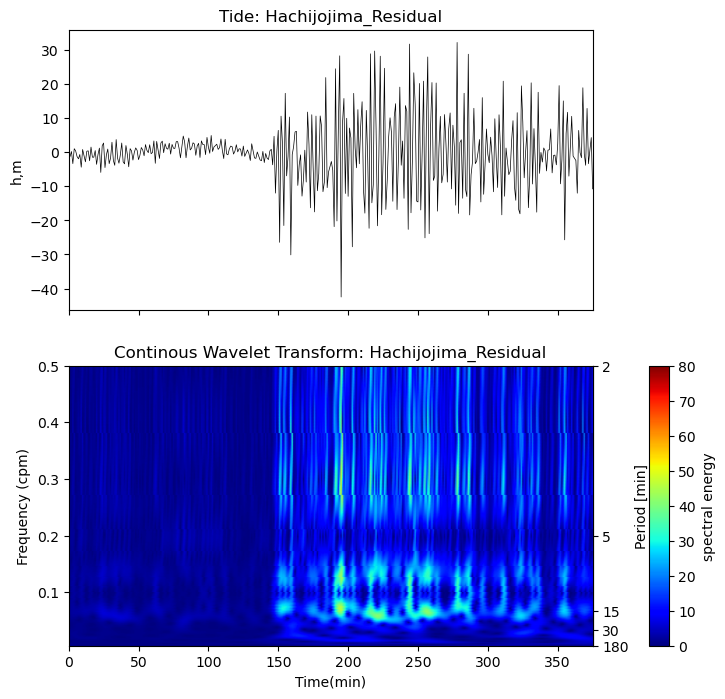

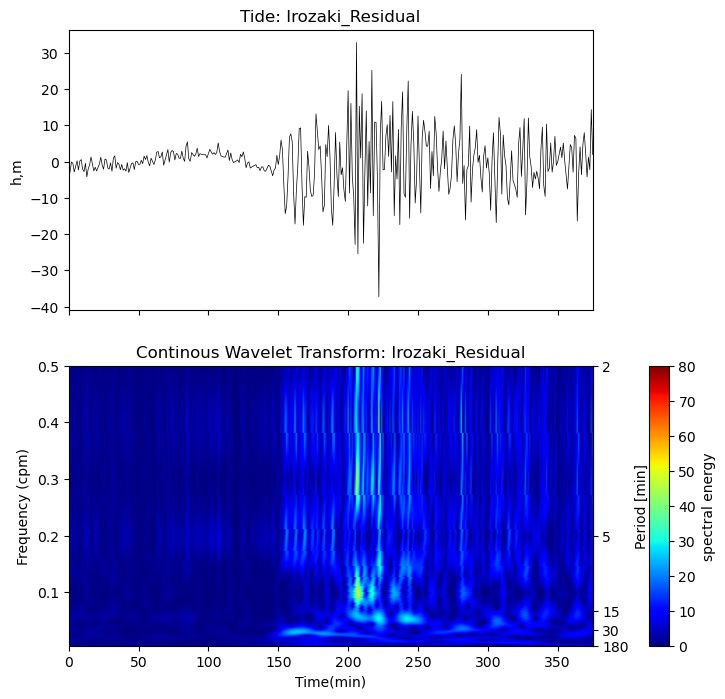

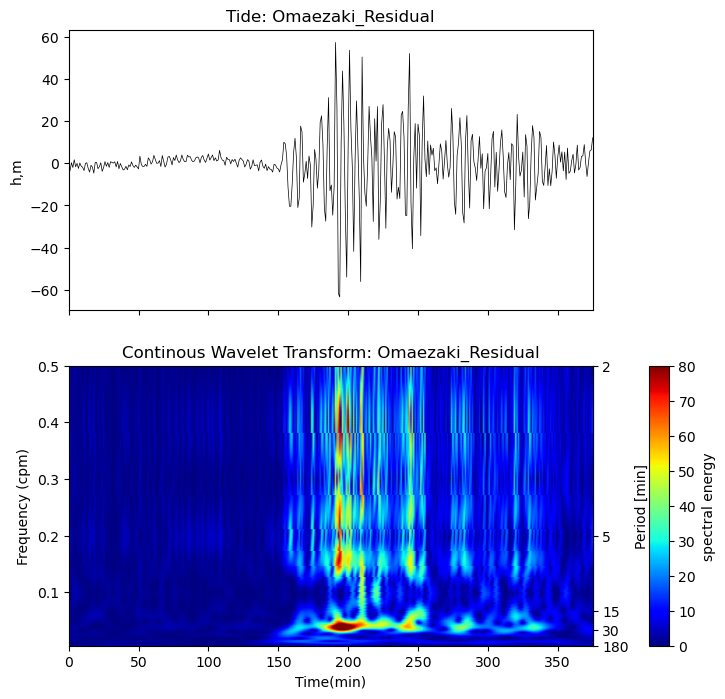

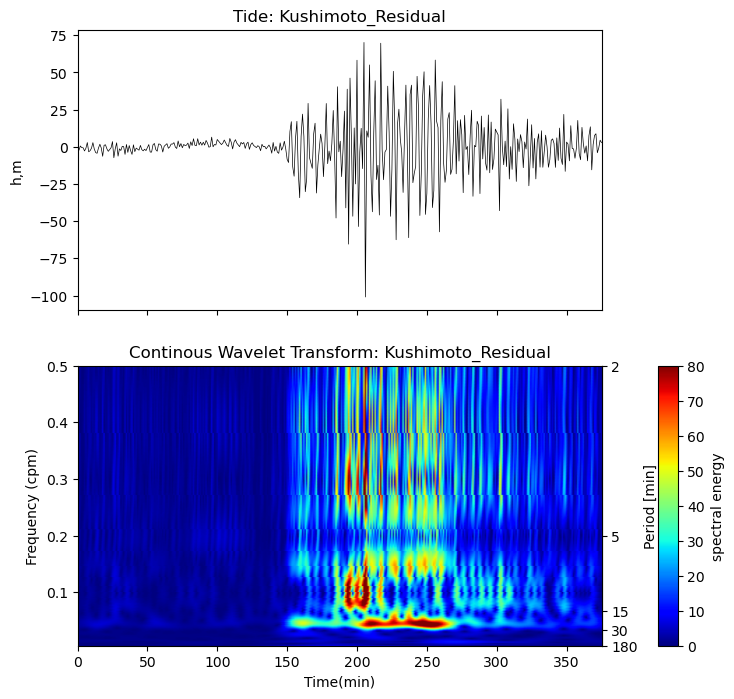

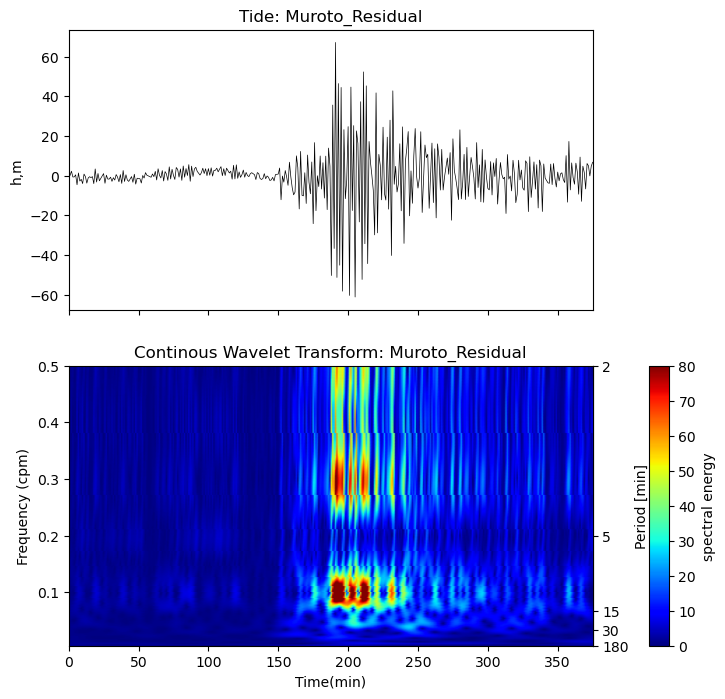

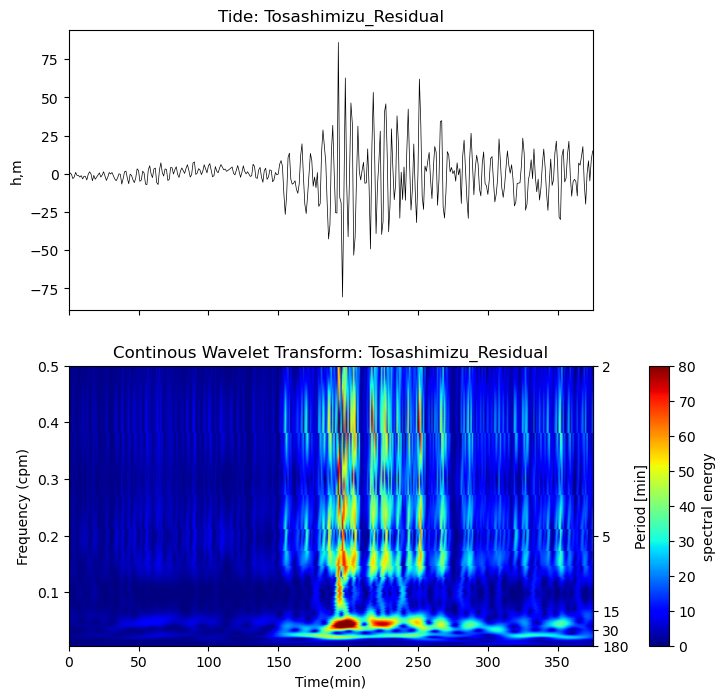

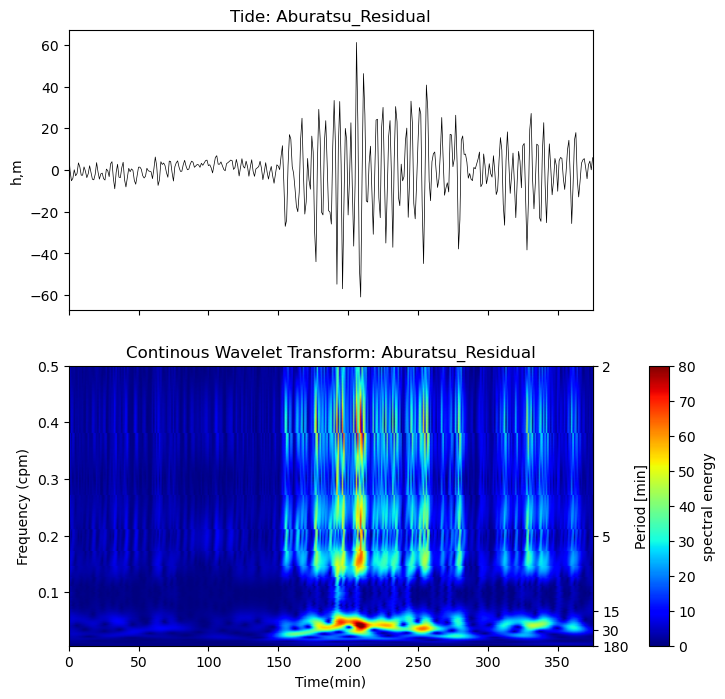

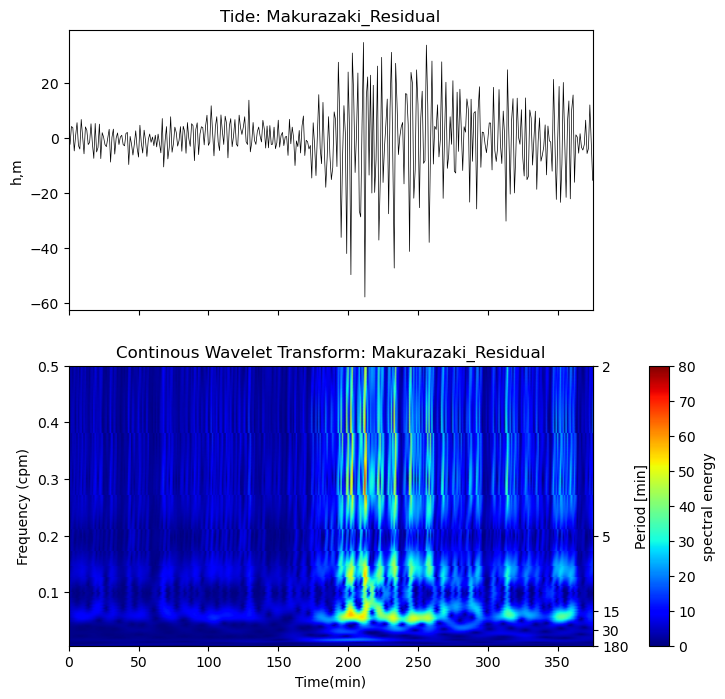

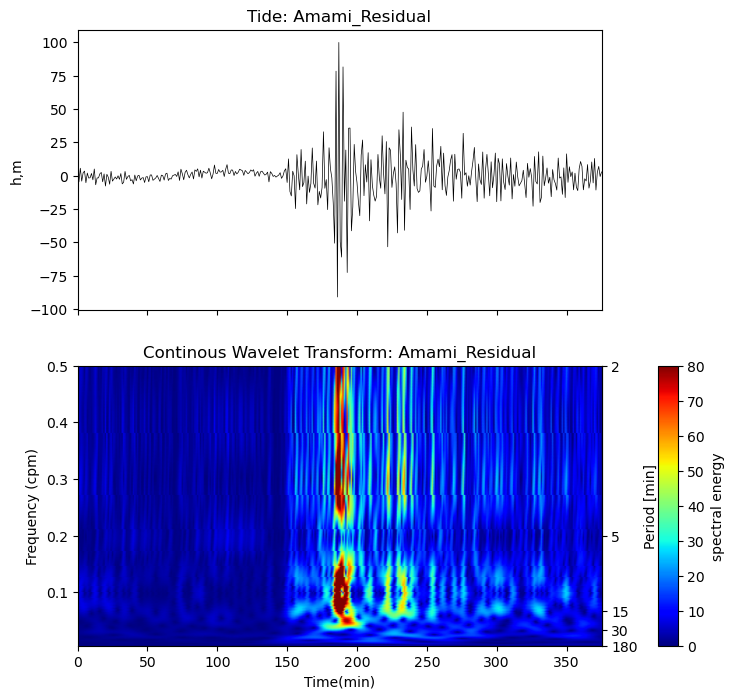

In [8]:
plt.ioff()
for i in range(15):
    cwt_plot(i,dftk,False)

----

In [9]:
import numpy as np
import matplotlib.style as mpls
mpls.use('default')

dft = dftk

def freq2period(x):
    # 1/x with special treatment of x == 0
    x = np.array(x).astype(float)
    near_zero = np.isclose(x, 0)
    x[near_zero] = 10e2
    x[~near_zero] = 1 / x[~near_zero]
    return x

def plot_spec(col=14, nfft=4, save=False, id=0):
    dt = 5
    sign = dft.iloc[:,col].to_numpy()
    xt = np.arange(0,dft.shape[0],1)
    # xl = np.arange(-250,dft.shape[0]*5,250)

    fig,axs = plt.subplots(2,sharex=True,figsize=(8,8))
    #plot waveform
    axs[0].plot(xt,sign,c='k',lw=0.5)
    axs[0].set_ylabel('h,m')
    axs[0].set_title(f'Tide: {dft.columns[col]}')
    
    #plot spectogram
    s,f,t,im = axs[1].specgram(sign,NFFT=nfft,Fs=5/dt,noverlap=nfft-2,cmap='jet',mode='psd')#,vmin=0,vmax=14)
    axs[1].set_title(f'Spectogram: {dft.columns[col]} / NFFT:{nfft}')
    # axs[1].set_xlim(500,2250)
    axs[1].set_xlabel('Time(min)')
    # axs[1].set_xticks(xt)
    # axs[1].set_xticklabels(xl)
    axs[1].set_ylabel('Frequency (cpm)')
    # axs[1].ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    # axs[1].set_ylim(10e-2,5e-1)

    #Second axis
    secax = axs[1].secondary_yaxis('right',functions=(freq2period,freq2period))
    secax.set_yticks([2,5,10])
    secax.set_yticklabels([2,5,10])
    secax.set_ylabel('Period [min]')
    
    #Colobar
    fig.subplots_adjust(right=0.75)
    cbar_ax = fig.add_axes([0.85,0.1,0.025,0.35])
    fig.colorbar(im,cax=cbar_ax)
    cbar_ax.set_title('dB');
    
    if save:
        plt.savefig(f'./figs_k/{id:04}.png')

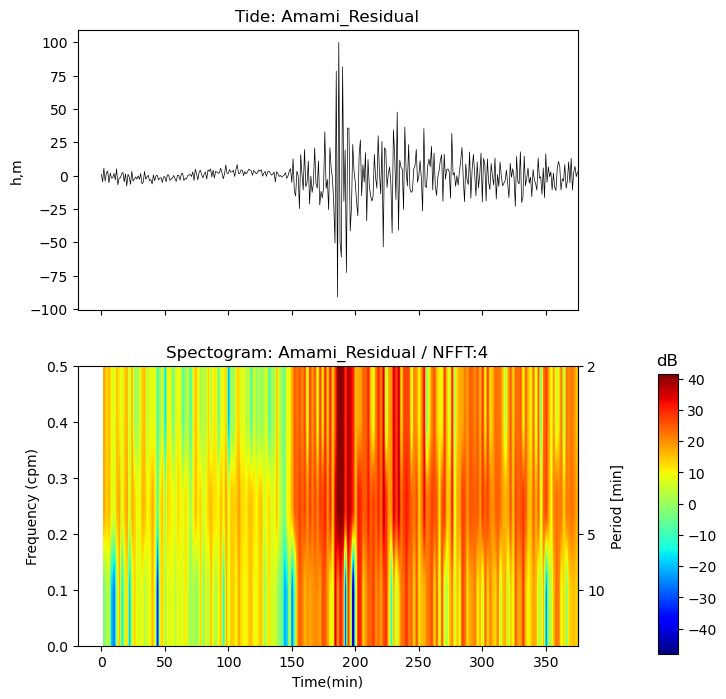

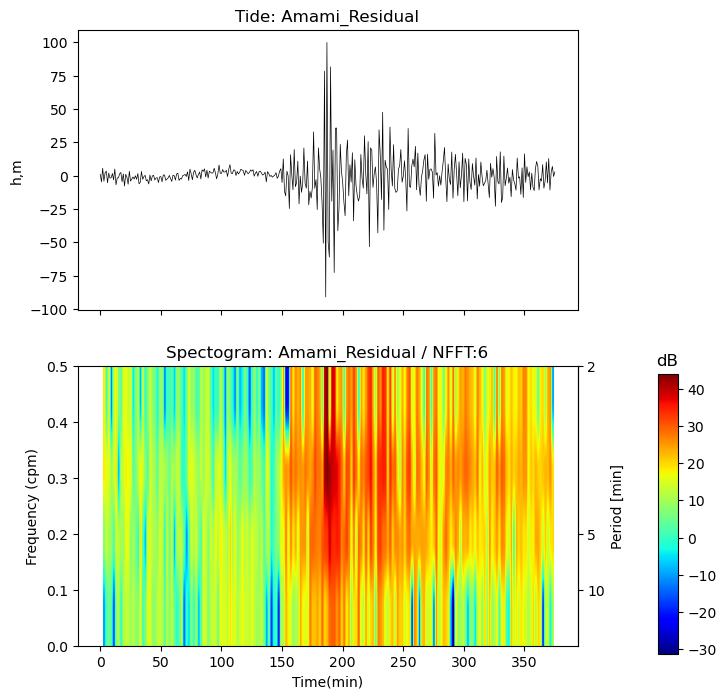

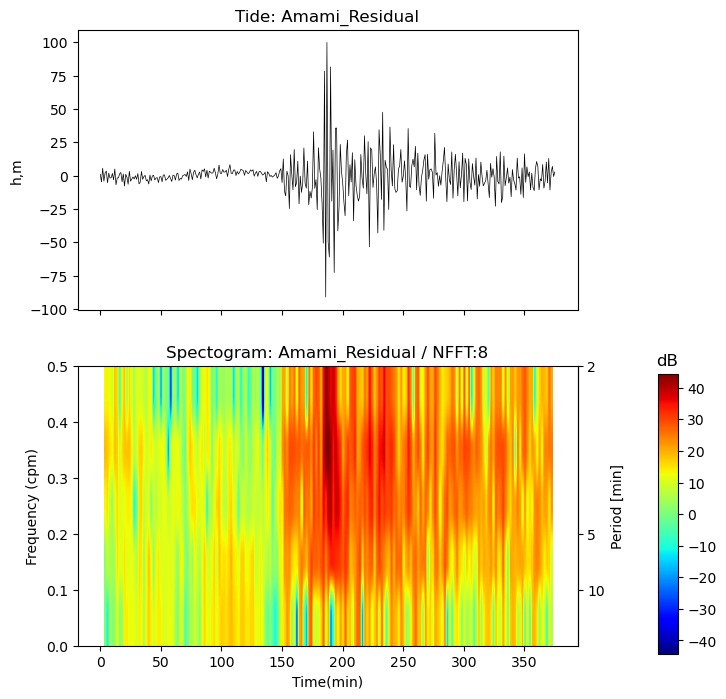

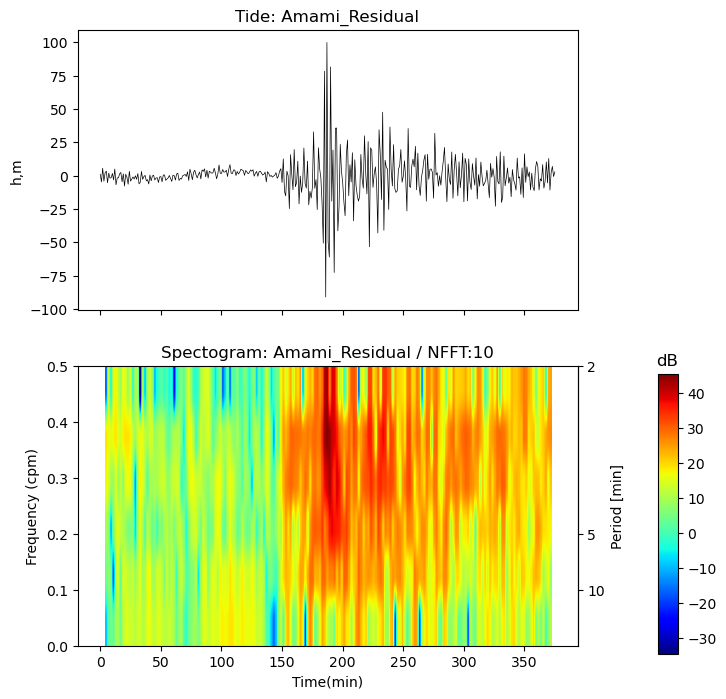

In [10]:
# cases = np.arange(4,257,1)
cases = np.arange(4,12,2)
for id in cases:
    plot_spec(14,id,False,id)